<a href="https://colab.research.google.com/github/nhhoang231/LogisticRegression-/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Hàm sigmoid

Hàm sigmoid là một hàm đơn điệu tăng, có giá trị giới hạn trong khoảng [0, 1]. Hàm sigmoid làm một hàm số phù hợp với các tác vụ dự báo xác suất.

Giả sử chúng ta có một bài toán phân loại nợ xấu với 2 khả năng: $y=1$ nếu là nợ xấu, $y=0$ nếu là hồ sơ tốt. 2 biến đầu vào dự báo là $\mathbf{x} = (x_1, x_2)$. Hồi qui logistic ta thu được một phương trình hồi qui có véc tơ hệ số $\mathbf{w} = (w_0, w_1, w_2)$ trong đó hệ số chặn là $w_0$ và hệ số tự do là $w_1, w_2$. Khi đó phương trình hàm sigmoid dự báo xác suất $P(y=1)$ tại quan sát $\mathbf{x}$:

$$f(\mathbf{w}^\intercal\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^\intercal\mathbf{x}}} = \sigma(\mathbf{w}^\intercal\mathbf{x})$$

$$\sigma(\mathbf{w}^\intercal\mathbf{x}) \in (0, 1); \forall \mathbf{w}, \mathbf{x} \in \mathbb{R}^{n}$$

Bên dưới cùng xây dựng một hàm sigmoid giả lập và dự báo xác suất xảy ra nợ xấu.

In [ ]:
import numpy as np

ones = np.ones(200)
x1 = np.linspace(-10, 10, 200) + np.random.uniform(0)
x2 = np.linspace(-5, 5, 200) + np.random.uniform(0)

w = np.array([1, 2, 3])

def _sigmoid(w, x):
  s = 1/(1+np.exp(-w.T.dot(x)))
  return s

# Xác suất dự báo từ hàm sigmoid
y_pred = [_sigmoid(w, x) for x in list(zip(ones, x1, x2))]

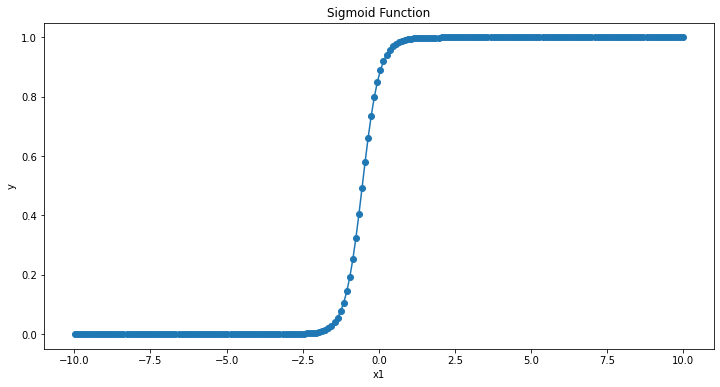

In [ ]:
# Visualize giá trị dự báo và giá trị thực tế
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.plot(x1, y_pred, marker = 'o')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.show()

Tổng quát công thức ước lượng xác suất cho 2 trường hợp nợ xấu và không nợ xấu:

$$
\left\{
\begin{matrix}
    P(y=1; \mathbf{x}) &=& \sigma(\mathbf{w}^\intercal\mathbf{x})~~~ \\
    P(y=0; \mathbf{x}) &=& 1-\sigma(\mathbf{w}^\intercal\mathbf{x})~~~ 
\end{matrix}
\right.$$

# 2. Ước lượng hợp lý tối đa (Maximum Likelihood Estimation)

## 2.1. Hàm hợp lý tối đa (Likelihood Function)

Trong thống kê hàm hợp lý tối đa đo lường mức độ phù hợp (goodness of fit) của một **mô hình thống kê** trên một **mẫu dữ liệu** cho một tập giá trị **tham số chưa biết** nào đó. Nó được tạo thành từ **xác suất xảy ra đồng thời** của mẫu, nhưng chúng ta coi nó là một hàm số đối với tham số, mẫu được giả định là cố định.

Ví dụ: giả sử $\mathbf{X}$ là các biến ngẫu nhiên rời rạc với hàm phân phối xác suất $p$ phụ thuộc vào tham số ước lượng $\theta$. Khi đó hàm hợp lý tối đa là một hàm của $\theta$ tại điểm $\mathbf{x}$:

$$\text{likelihood}(\theta|\mathbf{x}) = p_{\theta}(\mathbf{x}) = P(\mathbf{X} = \mathbf{x})$$

Bài 1: Tính giá trị của hàm hợp lý tại điểm $\mathbf{x} = (1, 2)$ với $\theta = (1, 2, 3)$. Biết rằng hàm phân phối xác suất $p_{\theta}(\mathbf{x})$ là hàm sigmoid.

In [ ]:
x = np.array([1, 1, 2]) # Thêm 1 cho hệ số tự do.
theta = np.array([1, 2, 3])

def _likelihood(theta, x):
  s = theta.dot(x)
  p = 1/(1+np.exp(-s))
  return p

_likelihood(theta = theta, x = x)

0.9525741268224334

Bài 2: Tính giá trị hàm hợp lý tối đa tại quan sát $x = 1$ biết phân $\mu, \sigma$ là các tham số của phân phối xác suất $p_{\mu, \sigma}(\mathbf{x})$ tuân theo phân phối chuẩn $\mathbf{N}(\mu, \sigma^2)$ và công thức của phân phối chuẩn là:

$$p(x|\mu, \sigma) = \frac{\exp{(\frac{-(x-\mu)^2}{2\sigma^2}})}{\sqrt{2\pi \sigma^2}}$$

In [ ]:
# Làm trong 5 phút
def _likelihood(x, mu, sigma):
  x_ = x - mu
  var = sigma**2
  px = np.exp(x_**2/2*var)/np.sqrt(2*np.pi*var)
  return px

_likelihood(x = 2, mu = 0, sigma = 1)

2.947806890121508

## 2.2. Ước lượng hợp lý tối đa (Maximum Likelihood Estimation - MLE)

Ước lượng hợp lý tối đa là phương pháp ước lượng tham số của một phân phối xác suất bằng cách tối đa hóa hàm hợp lý tối đa.

Tức là với một tập hợp quan sát đầu vào $\mathbf{X}$ và một hàm ước lượng xác suất $p_{\theta}(x)$ phụ thuộc vào tham số $\theta$. Ta cần tìm ra $\theta$ sao cho phân phối xác suất đồng thời của các quan sát trong $\mathbf{X}$ là lớn nhất. Mục tiêu của chúng ta là phải tìm ra nghiệm tối ưu của $\theta$ trong họ các tham số $\theta \in \Theta$ để hàm phân phối xác suất đồng thời bên dưới đạt cực đại:

$$\max_{\theta \in \Theta} L_n(\theta|\mathbf{X})$$

Hay chúng ta cần tìm nghiệm tối ưu:

$$\hat{\theta} = \arg \max_{\theta \in \Theta} L_n(\theta|\mathbf{X})$$

Trong trường hợp các quan sát là độc lập:

$$\hat{\theta} = \arg \max_{\theta \in \Theta} L_n(\theta|\mathbf{X}) = \arg \max_{\theta \in \Theta} \prod_{i=1}^{n} {\text{likelihood}(\theta|\mathbf{x}_i)} = \prod_{i=1}^{n} p_{\theta} (\mathbf{x}_i|y_i)$$

Bài 3: Tính xác suất xảy ra đồng thời của toàn bộ các điểm trong bộ dữ liệu $\mathbf{X} = [[1, 3], [2, 5], [3, 7], [4, 1], [5, 6], [6, 2], [7, 3], [8, 2], [9, 5], [10, 11]]$ và 
$\mathbf{y} = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]$
Biết rằng $s = \mathbf{\theta}^\intercal\mathbf{x} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$ có phân phối chuẩn hóa $\mathbf{N}(\mu, \sigma^2) = \mathbf{N}(0, 1)$ và $\mathbf{\theta} = (1, 2, 3)$.


Như vậy mục tiêu của ước lượng hợp lý tối đa là tìm ra bộ tham số mà giá trị xác suất xảy ra đồng thời của các quan sát là lớn nhất.

## 2.3. Hàm cross entropy

Xác suất xảy ra của điểm $\mathbf{x}_i$ theo hàm sigmoid:

$$
\left\{
\begin{matrix}
    P(y=1; \mathbf{x}) &=& \sigma(\mathbf{w}^\intercal\mathbf{x})~~~ \\
    P(y=0; \mathbf{x}) &=& 1-\sigma(\mathbf{w}^\intercal\mathbf{x})~~~ 
\end{matrix}
\right.$$

Như vậy công thức tổng quát cho cả 2 trường hợp $y=0$ và $y=1$ sẽ là:

$$P(y_i|\mathbf{x}_i; \mathbf{w}) = P(y=1)^{y_i}(1-P(y=1))^{(1-y_i)}$$

Phân phối xác suất đồng thời cho toàn bộ các quan sát trong bộ dữ liệu $\mathbf{X}$:

$$P(\mathbf{y}|\mathbf{X}; \mathbf{w}) = \prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w})$$

Chúng ta cần giải bài toán tối ưu:

$$\hat{\mathbf{w}} = \arg \max_{\mathbf{w}} \prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w})$$

Để dễ dàng hơn trong quá trình tính đạo hàm, chúng ta chuyển sang bài toán tối ưu logarith:

$$\begin{eqnarray}\hat{\mathbf{w}} & = & \arg \max_{\mathbf{w}} ~~~ \log(\prod_{i=1}^{n} P(y_i|\mathbf{x}_i; \mathbf{w})) \\
& = & \arg \max_{\mathbf{w}} \sum_{i=1}^{n} y_i\log(P(y_i=1)) + (1-y_i)\log(1-P(y_i=1)) \\
& = & \arg \min_{\mathbf{w}} \sum_{i=1}^{n} -(y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i)) 
\end{eqnarray}
$$

Ở đây $\hat{y}_i = P(y_i=1)$ là ước lượng xác suất tại điểm $\mathbf{x}_i$. Hàm loss function: 

$$\sum_{i=1}^{n} -(y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y}_i))$$

còn được gọi là hàm cross entropy đo lường tương quan giữa phân phối xác suất dự báo $(\hat{y}_i, 1-\hat{y}_i)$ và ground truth $(y_i, 1-y_i)$. Giá trị loss sẽ càng nhỏ nếu hai phân phối xác suất càng sát nhau, tức là giá trị dự báo  giống với thực tế nhất.

Bài 4: Vẽ biểu đồ hàm cross entropy theo phân phối xác suất $\hat{y}$ khi giá trị của $\hat{y}$ di chuyển trong khoảng $(0, 1)$ và giá trị của $y$ lần lượt tương ứng với các trường hợp $0, 0.5, 1$

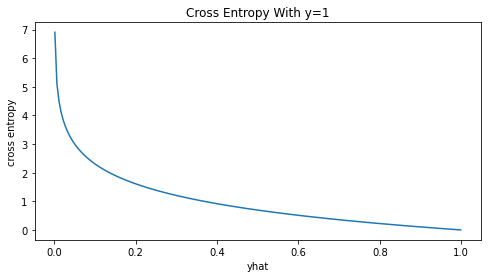

In [ ]:
def _cross_entropy(yhat, y):
  return -(y*np.log(yhat)+(1-y)*np.log((1-yhat)))

yhat = np.linspace(0.001, 0.999, 200)

def _plot_crs(yhat, y):
  cross_entropy = _cross_entropy(yhat, y)
  plt.figure(figsize = (8, 4))
  plt.plot(yhat, cross_entropy)
  plt.xlabel('yhat')
  plt.ylabel('cross entropy')
  plt.title('Cross Entropy With y={}'.format(y))
  plt.show()

_plot_crs(yhat, y=1)

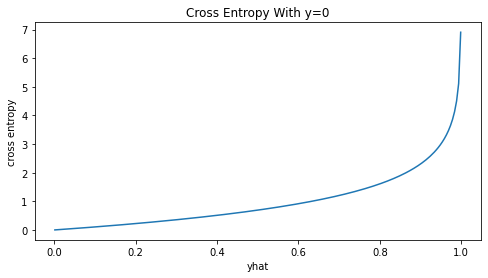

In [ ]:
_plot_crs(yhat, y=0)

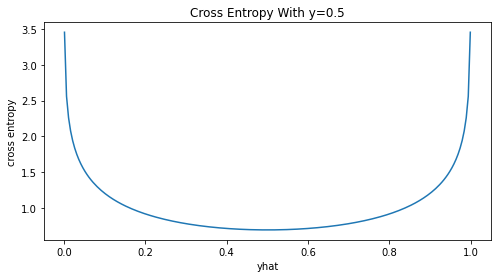

In [ ]:
_plot_crs(yhat, y=0.5)

Giá trị cực tiểu luôn đạt được tại $y=\hat{y}$

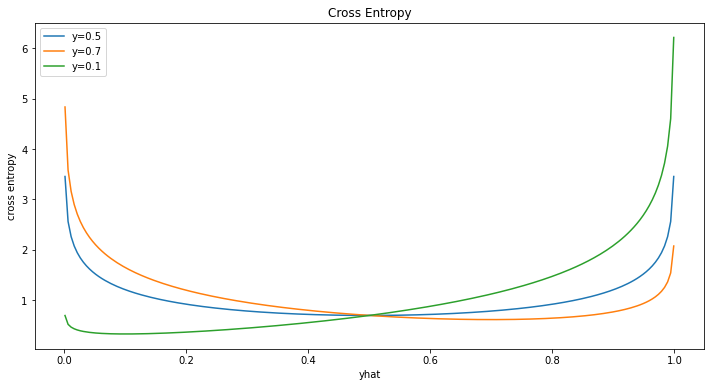

In [ ]:
crs1 = _cross_entropy(yhat, y=0.5)
crs2 = _cross_entropy(yhat, y=0.7)
crs3 = _cross_entropy(yhat, y=0.1)
plt.figure(figsize = (12, 6))
plt.plot(yhat, crs1, label='y=0.5')
plt.plot(yhat, crs2, label='y=0.7')
plt.plot(yhat, crs3, label='y=0.1')
plt.xlabel('yhat')
plt.ylabel('cross entropy')
plt.title('Cross Entropy')
plt.legend(loc='best')
plt.show()

# 3. Tìm cực trị của hàm cross entropy.

Để giải bài toán cực trị của hàm cross entropy thì trước tiên ta phải làm quen với bài toán tối ưu với điều kiện ràng buộc. Hiều đơn giản thì bài toán tối ưu với điều kiện ràng buộc là bài toán cực trị nhưng kèm theo những điều kiện đối với nghiệm. Ví dụ:

$$\mathbf{x} = \arg \min_{\mathbf{x}} f(\mathbf{x})$$

ĐK ràng buộc: $g(\mathbf{x}) = 0$






## 3.1. Hàm lagrange

Hàm lagrange sẽ đưa thêm điều kiện ràng buộc vào hàm mục tiêu để điều kiện ràng buộc luôn thỏa mãn. Với bài toán trên thì hàm lagrange của $f(\mathbf{x})$ sẽ là:

$$\mathcal{L}(\lambda, x_1, x_2) = f(\mathbf{x}) + \lambda g(\mathbf{x})$$.

# 3.2. Giải bài toán tối ưu cross entropy

Giả sử $\mathbf{y} = [y_1, ..., y_C]$ là phân phối xác suất ground truth đã biết và $\hat{\mathbf{y}} = [\hat{y}_1, \dots , \hat{y}_C]$ là phân phối xác suất dự báo thỏa mãn điều kiện ràng buộc $\sum_{i=1}^{C} \hat{y}_i = 1$. Tìm nghiệm tối ưu của hàm cross entropy:

$$f(\mathbf{\hat{y}}|\mathbf{y}) = \sum_{i=1}^C {-y_i\log(\hat{y_i})}$$

Ta có hàm lagrange:

$$\begin{eqnarray}\mathcal{L}(\lambda, \mathbf{\hat{y}}) & = & f(\mathbf{\hat{y}}|\mathbf{y}) + \lambda (1-\sum_{i=1}^{C} \hat{y}_i) \\
& = & \sum_{i=1}^C {-y_i\log(\hat{y_i})} + \lambda (1-\sum_{i=1}^{C} \hat{y}_i) \end{eqnarray}$$.

Hệ phương trình đạo hàm bậc nhất theo các biến $\hat{y}_i, \lambda$ ta được:


$$
\left\{
\begin{matrix}
    \nabla_{\hat{y}_i} \mathcal{L}(\lambda, \mathbf{\hat{y}}) &=& - {\frac{y_i}{\hat{y_i}}} - \lambda~~~ &, \forall i=\overline{1, C} ~~~ \\
    \nabla_{\lambda} \mathcal{L}(\lambda, \mathbf{\hat{y}}) &=& 1-\sum_{i=1}^{C} \hat{y}_i & ~~~ 
\end{matrix}
\right.$$

Giải phương trình đạo hàm bậc nhất bằng 0 ta suy ra nghiệm $y_i = \hat{y}_i, \forall i=\overline{1, C}$. Tức là phân phối xác suất dự báo $\hat{\mathbf{y}}$ phải bằng ground truth $\mathbf{y}$.